In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [61]:
df = pd.read_csv('D:\excelR\Decision_Trees\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [63]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [64]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [65]:
from sklearn.preprocessing import LabelEncoder
cols = ['Undergrad', 'Marital.Status', 'Urban']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df2=df
df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


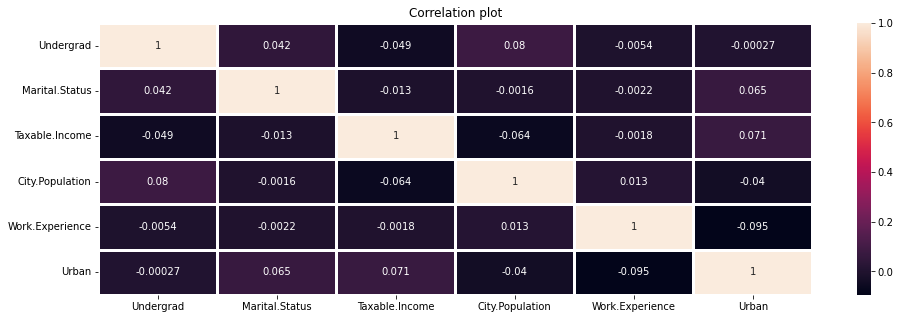

In [66]:
import seaborn as sns 
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(df2.corr(),annot = True,linewidths=3)
plt.title("Correlation plot")
plt.show()

In [67]:
df2['Tax_labels'] = pd.cut(x=df2['Taxable.Income'], bins=[0,30000,99999], labels=['Risky', 'Good'], right=False)
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_labels
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


# Model Validation

# Train-Test-Split

In [68]:
from sklearn.model_selection import train_test_split
y = df2.pop("Tax_labels")
X = df2.iloc[:,0:7]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (480, 6)
train size y :  (480,)
test size X :  (120, 6)
test size y :  (120,)


# Bagging

# Bagging Classifier

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  0  99]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
            Good  Risky  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    381.0   99.0       1.0      480.0         480.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 0 25]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Good  Risky  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    95.0   25.0       1.0      120.0         120.0


In [71]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0}}

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  0  99]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
            Good  Risky  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    381.0   99.0       1.0      480.0         480.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 0 25]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Good  Risky  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    95.0   25.0       1.0      120.0         120.0


In [73]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0},
 'Random Forest': {'Train': 1.0, 'Test': 1.0}}

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=100, max_features=5, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  0  99]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
            Good  Risky  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    381.0   99.0       1.0      480.0         480.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 0 25]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Good  Risky  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    95.0   25.0       1.0      120.0         120.0


In [75]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0},
 'Random Forest': {'Train': 1.0, 'Test': 1.0},
 'Extra Tree': {'Train': 1.0, 'Test': 1.0}}

# Boosting

# Adaboost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  0  99]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
            Good  Risky  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    381.0   99.0       1.0      480.0         480.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 0 25]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Good  Risky  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    95.0   25.0       1.0      120.0         120.0


In [77]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0},
 'Random Forest': {'Train': 1.0, 'Test': 1.0},
 'Extra Tree': {'Train': 1.0, 'Test': 1.0},
 'AdaBoost': {'Train': 1.0, 'Test': 1.0}}

# Stochastic Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  0  99]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
            Good  Risky  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    381.0   99.0       1.0      480.0         480.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 0 25]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           Good  Risky  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    95.0   25.0       1.0      120.0         120.0


In [79]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0},
 'Random Forest': {'Train': 1.0, 'Test': 1.0},
 'Extra Tree': {'Train': 1.0, 'Test': 1.0},
 'AdaBoost': {'Train': 1.0, 'Test': 1.0},
 'Gradient Boosting': {'Train': 1.0, 'Test': 1.0}}

# Stacking

# Voting Ensemble

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[381   0]
 [  7  92]]
ACCURACY SCORE:
0.9854
CLASSIFICATION REPORT:
                 Good      Risky  accuracy   macro avg  weighted avg
precision    0.981959   1.000000  0.985417    0.990979      0.985680
recall       1.000000   0.929293  0.985417    0.964646      0.985417
f1-score     0.990897   0.963351  0.985417    0.977124      0.985216
support    381.000000  99.000000  0.985417  480.000000    480.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[95  0]
 [ 3 22]]
ACCURACY SCORE:
0.9750
CLASSIFICATION REPORT:
                Good     Risky  accuracy   macro avg  weighted avg
precision   0.969388   1.00000     0.975    0.984694      0.975765
recall      1.000000   0.88000     0.975    0.940000      0.975000
f1-score    0.984456   0.93617     0.975    0.960313      0.974396
support    95.000000  25.00000     0.975  120.000000    120.000000


In [81]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0},
 'Random Forest': {'Train': 1.0, 'Test': 1.0},
 'Extra Tree': {'Train': 1.0, 'Test': 1.0},
 'AdaBoost': {'Train': 1.0, 'Test': 1.0},
 'Gradient Boosting': {'Train': 1.0, 'Test': 1.0},
 'Voting': {'Train': 0.9854166666666667, 'Test': 0.975}}

# Comparing Models

<AxesSubplot:>

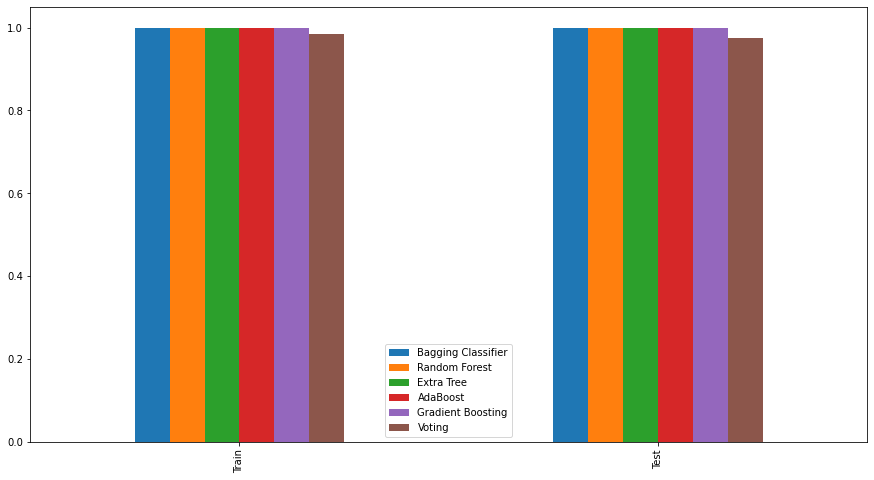

In [82]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='bar', figsize=(15, 8))

# Regression

In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# Model Validation
# K-fold cross validation

In [102]:
from sklearn.model_selection import KFold
df3 = pd.DataFrame(df2, columns = ["Undergrad", "Marital.Status", "City.Population", "Work.Experience", "Urban"])
array = df3.values
array2 = df2.values
X2 = array[:,0:6]
y2 = array2[:,2]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [103]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X2, y2)
    y2_pred = model.predict(X2)
    
    return mean_squared_error(y2, y2_pred, squared= False) # squared= False > returns Root Mean Square Error

In [104]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)
models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 26038.18191303339


In [105]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= 42))
score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 26038.181913033488


In [106]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

KernelRidge Score= 28952.337355758802


C:\Users\Tripti\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [107]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
score =rmse(decision_tree)
models_scores.append(['DecisionTreeRegressor', score])
print(f'DecisionTreeRegressor Score= {score}')

DecisionTreeRegressor Score= 0.0


In [108]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
SVR = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
score = rmse(SVR)
models_scores.append(['SVR', score])
print(f'SVR Score= {score}')

SVR Score= 26182.496245892442


In [109]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
3,DecisionTreeRegressor,0.000000
0,LinearRegression,26038.181913
1,Lasso,26038.181913
4,SVR,26182.496246
2,KernelRidge,28952.337356


# Bagging

# Bagging Regressor

In [110]:
def bagging_predictions(estimator):
    
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= -1,
                            random_state=42).fit(X2, y2)

    br_y_pred = regr.predict(X2)

    rmse_val = mean_squared_error(y2, br_y_pred, squared= False) # squared= False > returns Root Mean Square Error   

    print(f'RMSE for Bagging Regressor as base estimator {regr.base_estimator_} = {rmse_val}\n')
    return br_y_pred
    
predictions = np.column_stack((bagging_predictions(linear_regression),
                              bagging_predictions(lasso),
                              bagging_predictions(SVR),
                              bagging_predictions(decision_tree),
                              bagging_predictions(kernel_ridge)))


RMSE for Bagging Regressor as base estimator Pipeline(steps=[('linearregression', LinearRegression())]) = 26055.262849176754

RMSE for Bagging Regressor as base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=42))]) = 26055.262883817515

RMSE for Bagging Regressor as base estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) = 26182.590011460044

RMSE for Bagging Regressor as base estimator DecisionTreeRegressor() = 11727.907954226106

RMSE for Bagging Regressor as base estimator KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial') = 28928.3321441592



# Boosting

In [111]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   random_state = 42)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 21402.138480528807


In [112]:
xgb_regressor= xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, random_state = 42)
score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 23081.818528749845


In [113]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=100,
                              random_state = 42)
score = rmse(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

LGBMRegressor Score= 24173.650489656284


In [114]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
3,DecisionTreeRegressor,0.000000
5,GradientBoostingRegressor,21402.138481
6,XGBRegressor,23081.818529
7,LGBMRegressor,24173.650490
0,LinearRegression,26038.181913
1,Lasso,26038.181913
4,SVR,26182.496246
2,KernelRidge,28952.337356


# Stacking

In [115]:
estimators = [ ('decision_tree', decision_tree), ('SVR', SVR)]

stack = StackingRegressor(estimators=estimators, cv= kfold, n_jobs= -1, passthrough = True)

stack.fit(X2, y2)

pred = stack.predict(X2)

rmse_val = mean_squared_error(y2, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}') 

rmse= 26922.963205145737


# Comparing Models

In [116]:
models_df = pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)
models_df.columns = ['Models', 'Rmse_vales']
models_df

,Models,Rmse_vales
3,DecisionTreeRegressor,0.000000
5,GradientBoostingRegressor,21402.138481
6,XGBRegressor,23081.818529
7,LGBMRegressor,24173.650490
0,LinearRegression,26038.181913
1,Lasso,26038.181913
4,SVR,26182.496246
8,Stacking,26922.963205
2,KernelRidge,28952.337356


<AxesSubplot:xlabel='Models'>

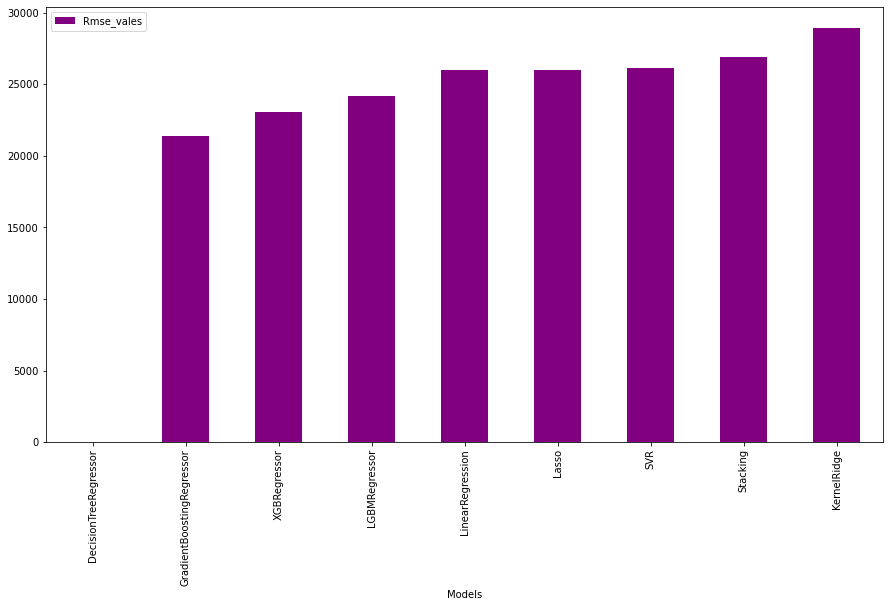

In [118]:
models_df.plot(x='Models', y='Rmse_vales', kind='bar', figsize=(15, 8),color='purple')